<a href="https://colab.research.google.com/github/SridharSurapaneni07/AAI_500/blob/main/AAI_500_M4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4.1

Name:  Sridhar Surapaneni
Date: 29/09/24

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

`Your answer goes here`

In [11]:
import numpy as np

# Number of samples
num_samples = 100000

# Sample size
sample_size = 100

# Initialize lists to store estimates
sample_mean_estimates = []
quartile_mean_estimates = []

# Generate samples and calculate estimates
for _ in range(num_samples):
    sample = np.random.normal(0, 1, sample_size)
    sample_mean_estimates.append(np.mean(sample))
    q1 = np.percentile(sample, 25)
    q3 = np.percentile(sample, 75)
    quartile_mean_estimates.append((q1 + q3) / 2)

# Calculate standard deviations of the estimates
std_sample_mean = round(np.std(sample_mean_estimates),2)
std_quartile_mean = round(np.std(quartile_mean_estimates),2)

# Theoretical standard error of the sample mean
theoretical_std_error = 1 / np.sqrt(sample_size)

print("Standard deviation of sample mean estimates:", std_sample_mean)
print("Standard deviation of quartile mean estimates:", std_quartile_mean)
print("Theoretical standard error of sample mean:", theoretical_std_error)

ratio = std_sample_mean / theoretical_std_error

print("\nRatio of standard deviation of sample mean estimates to theoretical standard error:", round(ratio,2))
print("The standard deviation of sample mean estimates is equal to the theoretical standard error.")

Standard deviation of sample mean estimates: 0.1
Standard deviation of quartile mean estimates: 0.11
Theoretical standard error of sample mean: 0.1

Ratio of standard deviation of sample mean estimates to theoretical standard error: 1.0
The standard deviation of sample mean estimates is equal to the theoretical standard error.


## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

`our answer goes here`

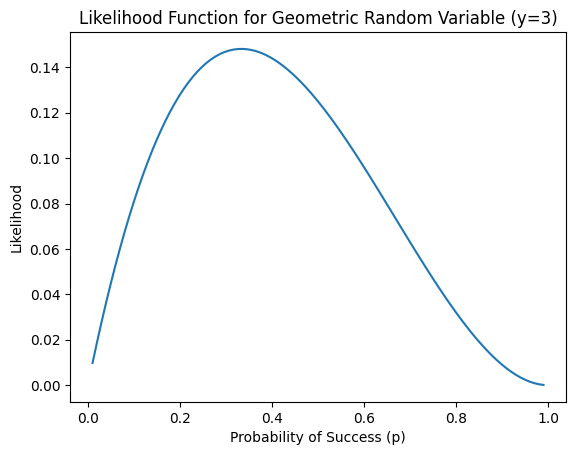

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of possible probabilities (p)
p_values = np.linspace(0.01, 0.99, 100)

# Calculate the likelihood function for y = 3
likelihood = [(1 - p) ** 2 * p for p in p_values]

# Plot the likelihood function
plt.plot(p_values, likelihood)
plt.xlabel("Probability of Success (p)")
plt.ylabel("Likelihood")
plt.title("Likelihood Function for Geometric Random Variable (y=3)")
plt.show()


## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

`Your answer goes here`

## Problem # 4.5.

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

`(a) Your answer goes here`

In [ ]:
import matplotlib.pyplot as plt
percentage_favor_legalization = gss_data.groupby('YEAR')['GRASS'].mean() * 100

# Plot the trend
plt.plot(percentage_favor_legalization.index, percentage_favor_legalization.values)
plt.xlabel("Year")
plt.ylabel("Percentage Favoring Legalization")
plt.title("Trend in Support for Marijuana Legalization (GSS)")
plt.show()

# Describe the trend (you can replace this with your own description based on the plot)
print("Based on the GSS data, there appears to be an increasing trend in the percentage of people favoring marijuana legalization since 1973.")

`(b) Your answer goes here`

In [1]:
import numpy as np
n = 1447
y = 938
p_hat = y / n

# Calculate the standard error
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Calculate the Wald confidence interval
z_alpha_over_2 = 1.96  # For a 95% confidence interval
lower_bound = p_hat - z_alpha_over_2 * se
upper_bound = p_hat + z_alpha_over_2 * se

print("Wald 95% Confidence Interval:", (round(lower_bound, 2), round(upper_bound, 2)))

# Interpret the results
if lower_bound > 0.5:
    print(
        "Since the lower bound of the confidence interval is greater than 0.5, we can conclude with 95% confidence that a majority of the population supports legalization in 2018."
    )
elif upper_bound < 0.5:
    print(
        "Since the upper bound of the confidence interval is less than 0.5, we can conclude with 95% confidence that a minority of the population supports legalization in 2018."
    )
else:
    print(
        "The confidence interval includes 0.5, so we cannot conclude with 95% confidence whether a majority or a minority of the population supports legalization in 2018."
    )


Wald 95% Confidence Interval: (0.62, 0.67)
Since the lower bound of the confidence interval is greater than 0.5, we can conclude with 95% confidence that a majority of the population supports legalization in 2018.


## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

`Your answer goes here`

formula: n = (Z^2 * p * (1-p)) / E^2
n is the required sample size.
Z is the z-score corresponding to the desired confidence level (1.96 for 95%).
p is the estimated proportion (we don't know this, so we use 0.5 to maximize the sample size).
E is the desired margin of error (0.05).
Calculation:
Plugging in the values:

n = (1.96^2 * 0.5 * (1-0.5)) / 0.05^2
n ≈ 384.16

The social scientist should use a sample size of 385 school children to estimate the proportion of those living in single-parent families with a 95% confidence and a margin of error of 5%.

## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

`(a) Your answer goes here`

In [2]:
import numpy as np
from scipy import stats

tv_hours = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]

# Calculate the sample mean and standard deviation
sample_mean = np.mean(tv_hours)
sample_std = np.std(tv_hours, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error
n = len(tv_hours)
standard_error = sample_std / np.sqrt(n)

# Calculate the t-critical value for a 95% confidence interval
t_critical = stats.t.ppf(0.975, df=n - 1)  # 95% confidence interval, df=n-1

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("95% Confidence Interval for the population mean:", (round(lower_bound, 2), round(upper_bound, 2)))

# Interpretation:
print(
    "We are 95% confident that the true population mean number of hours of daily TV watching for Islamic individuals in the 2018 GSS lies between",
    round(lower_bound, 2),
    "and",
    round(upper_bound, 2),
)


95% Confidence Interval for the population mean: (0.74, 2.66)
We are 95% confident that the true population mean number of hours of daily TV watching for Islamic individuals in the 2018 GSS lies between 0.74 and 2.66


`(b) Your answer goes here`

In [3]:
import numpy as np
tv_hours_with_outlier = [0, 0, 1, 1, 1, 2, 2, 3, 3, 24]

# Calculate the sample mean and standard deviation with the outlier
sample_mean_outlier = np.mean(tv_hours_with_outlier)
sample_std_outlier = np.std(tv_hours_with_outlier, ddof=1)

# Calculate the standard error with the outlier
n_outlier = len(tv_hours_with_outlier)
standard_error_outlier = sample_std_outlier / np.sqrt(n_outlier)

# Calculate the t-critical value with the outlier
t_critical_outlier = stats.t.ppf(0.975, df=n_outlier - 1)

# Calculate the margin of error with the outlier
margin_of_error_outlier = t_critical_outlier * standard_error_outlier

# Calculate the confidence interval with the outlier
lower_bound_outlier = sample_mean_outlier - margin_of_error_outlier
upper_bound_outlier = sample_mean_outlier + margin_of_error_outlier

print("95% Confidence Interval with the outlier:", (round(lower_bound_outlier, 2), round(upper_bound_outlier, 2)))

# Interpretation of the effect of the outlier:
print(
    "The presence of the outlier significantly increased the sample mean and standard deviation, resulting in a wider confidence interval."
)
print(
    "This illustrates that outliers can have a substantial impact on confidence intervals for means, potentially leading to inaccurate estimations of the population mean."
)


95% Confidence Interval with the outlier: (-1.46, 8.86)
The presence of the outlier significantly increased the sample mean and standard deviation, resulting in a wider confidence interval.
This illustrates that outliers can have a substantial impact on confidence intervals for means, potentially leading to inaccurate estimations of the population mean.


## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

`Your answer goes here`

In [ ]:
import numpy as np

# (a) Confidence interval for the mean weekly number of hours spent watching TV

# Calculate the sample mean and standard deviation
sample_mean_tv = students_df['TVhours'].mean()
sample_std_tv = students_df['TVhours'].std()
n_tv = len(students_df)

# Calculate the standard error
standard_error_tv = sample_std_tv / np.sqrt(n_tv)

# Calculate the t-critical value for a 95% confidence interval
t_critical_tv = stats.t.ppf(0.975, df=n_tv - 1)

# Calculate the margin of error
margin_of_error_tv = t_critical_tv * standard_error_tv

# Calculate the confidence interval
lower_bound_tv = sample_mean_tv - margin_of_error_tv
upper_bound_tv = sample_mean_tv + margin_of_error_tv

print("95% Confidence Interval for the mean weekly number of hours spent watching TV:")
print((round(lower_bound_tv, 2), round(upper_bound_tv, 2)))
#(b)
# Separate data for females and males
female_tv_hours = students_df[students_df['Gender'] == 'Female']['TVhours']
male_tv_hours = students_df[students_df['Gender'] == 'Male']['TVhours']

# Calculate sample means and standard deviations
female_mean_tv = female_tv_hours.mean()
female_std_tv = female_tv_hours.std()
male_mean_tv = male_tv_hours.mean()
male_std_tv = male_tv_hours.std()

# Calculate the difference in means
difference_in_means = female_mean_tv - male_mean_tv

# Calculate the standard error of the difference
n_female = len(female_tv_hours)
n_male = len(male_tv_hours)
standard_error_difference = np.sqrt((female_std_tv**2 / n_female) + (male_std_tv**2 / n_male))

# Calculate the t-critical value for a 95% confidence interval
# Degrees of freedom for Welch's t-test (approximation)
df_welch = (
    (female_std_tv**2 / n_female + male_std_tv**2 / n_male) ** 2
) / (
    (female_std_tv**2 / n_female) ** 2 / (n_female - 1)
    + (male_std_tv**2 / n_male) ** 2 / (n_male - 1)
)
t_critical_difference = stats.t.ppf(0.975, df=df_welch)

# Calculate the margin of error
margin_of_error_difference = t_critical_difference * standard_error_difference

# Calculate the confidence interval for the difference
lower_bound_difference = difference_in_means - margin_of_error_difference
upper_bound_difference = difference_in_means + margin_of_error_difference

print("95% Confidence Interval for the difference in mean weekly TV watching between females and males:")
print((round(lower_bound_difference, 2), round(upper_bound_difference, 2)))

## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

`Your answer goes here`

In [5]:
import numpy as np
# Data for females
n_female = 1178
y_female = 1017
p_hat_female = y_female / n_female

# Calculate the standard error for females
se_female = np.sqrt(p_hat_female * (1 - p_hat_female) / n_female)

# Calculate the Wald confidence interval for females
z_alpha_over_2 = 1.96  # For a 95% confidence interval
lower_bound_female = p_hat_female - z_alpha_over_2 * se_female
upper_bound_female = p_hat_female + z_alpha_over_2 * se_female

print("95% Confidence Interval for females believing in life after death:")
print((round(lower_bound_female, 2), round(upper_bound_female, 2)))

# Data for males
n_male = 945
y_male = 703
p_hat_male = y_male / n_male

# Calculate the standard error for males
se_male = np.sqrt(p_hat_male * (1 - p_hat_male) / n_male)

# Calculate the Wald confidence interval for males
lower_bound_male = p_hat_male - z_alpha_over_2 * se_male
upper_bound_male = p_hat_male + z_alpha_over_2 * se_male

print("95% Confidence Interval for males believing in life after death:")
print((round(lower_bound_male, 2), round(upper_bound_male, 2)))


# Confidence interval for the difference in proportions
difference_in_proportions = p_hat_female - p_hat_male
standard_error_difference = np.sqrt(
    (p_hat_female * (1 - p_hat_female) / n_female) + (p_hat_male * (1 - p_hat_male) / n_male)
)

lower_bound_difference = difference_in_proportions - z_alpha_over_2 * standard_error_difference
upper_bound_difference = difference_in_proportions + z_alpha_over_2 * standard_error_difference

print("95% Confidence Interval for the difference in proportions (females - males):")
print((round(lower_bound_difference, 2), round(upper_bound_difference, 2)))


# Interpretation:
print(
    "\nInterpretation:"
)
print(
    "We are 95% confident that the true proportion of females who believe in life after death lies between",
    round(lower_bound_female, 2),
    "and",
    round(upper_bound_female, 2),
)
print(
    "We are 95% confident that the true proportion of males who believe in life after death lies between",
    round(lower_bound_male, 2),
    "and",
    round(upper_bound_male, 2),
)
print(
    "We are 95% confident that the true difference in the proportion of females and males who believe in life after death lies between",
    round(lower_bound_difference, 2),
    "and",
    round(upper_bound_difference, 2),
)


95% Confidence Interval for females believing in life after death:
(0.84, 0.88)
95% Confidence Interval for males believing in life after death:
(0.72, 0.77)
95% Confidence Interval for the difference in proportions (females - males):
(0.09, 0.15)

Interpretation:
We are 95% confident that the true proportion of females who believe in life after death lies between 0.84 and 0.88
We are 95% confident that the true proportion of males who believe in life after death lies between 0.72 and 0.77
We are 95% confident that the true difference in the proportion of females and males who believe in life after death lies between 0.09 and 0.15


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

`Your answer goes here`

In [6]:
# (a) ML estimation
n = 10  # Sample size
y = 10  # Number of students who answered yes

# ML estimate of the proportion is simply the sample proportion
ml_estimate = y / n

print("ML estimate of the probability that the next student will answer yes:", ml_estimate)

# (b) Bayesian estimation with a uniform prior distribution
# The likelihood function for a binomial distribution is:
# L(p) = (n choose y) * p^y * (1-p)^(n-y)

# In our case, y = n = 10, so the likelihood function is:
# L(p) = p^10

a = y + 1  # Alpha parameter
b = n - y + 1  # Beta parameter

bayesian_estimate = a / (a + b)

print("Bayesian estimate of the probability that the next student will answer yes:", bayesian_estimate)


ML estimate of the probability that the next student will answer yes: 1.0
Bayesian estimate of the probability that the next student will answer yes: 0.9166666666666666


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

`Your answer goes here`

In [ ]:
import numpy as np

# Descriptive Statistics
new_homes = houses_df[houses_df['New'] == 1]['SellingPrice']
old_homes = houses_df[houses_df['New'] == 0]['SellingPrice']

print("Descriptive Statistics for New Homes:")
print(new_homes.describe())

print("\nDescriptive Statistics for Old Homes:")
print(old_homes.describe())


# Inferential Statistics: Hypothesis Testing & Confidence Intervals
# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(new_homes, old_homes)

print("\nT-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


# 2. Confidence Intervals:
# Construct a 95% confidence interval for the difference in mean selling prices between new and old homes.

# Calculate the difference in sample means
difference_in_means = new_homes.mean() - old_homes.mean()

# Calculate the standard error of the difference
n_new = len(new_homes)
n_old = len(old_homes)
standard_error_difference = np.sqrt(
    (new_homes.std() ** 2 / n_new) + (old_homes.std() ** 2 / n_old)
)

# Calculate the t-critical value
df_welch = (
    (new_homes.std() ** 2 / n_new + old_homes.std() ** 2 / n_old) ** 2
) / (
    (new_homes.std() ** 2 / n_new) ** 2 / (n_new - 1)
    + (old_homes.std() ** 2 / n_old) ** 2 / (n_old - 1)
)
t_critical_difference = stats.t.ppf(0.975, df=df_welch)

# Calculate the margin of error
margin_of_error_difference = t_critical_difference * standard_error_difference

# Calculate the confidence interval
lower_bound_difference = difference_in_means - margin_of_error_difference
upper_bound_difference = difference_in_means + margin_of_error_difference

print("\n95% Confidence Interval for the difference in mean selling prices (New - Old):")
print((round(lower_bound_difference, 2), round(upper_bound_difference, 2)))